# Covariance breakdown

In this notebook we will see what the covariance breakdown package actually *does*. That is, we will see a real covariance matrix used by the Dark Energy Survey for cosmic shear broken down into constituent components.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import covariance_breakdown as cb

In [3]:
plt.rc("font", size=18, family="serif")
#plt.rc("text", usetex=True)

In [4]:
#Load in the covariance matrix
C = np.load("cosmic_shear_covariance.npy")
print(C.shape)

(200, 200)


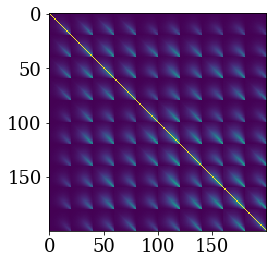

In [5]:
#Let's create and visualize the correlation matrix
s = np.diag(np.sqrt(C.diagonal()))
sinv = np.linalg.inv(s)
R = np.dot(sinv, np.dot(C, sinv))
plt.imshow(R)

In [6]:
#Pass the covariance matrix into a breakdown object and print the attributes
breakdown = cb.breakdown(C)
print(dir(breakdown))

['C', 'D', 'L', 'Lprime', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'from_D_Lprime']


In [7]:
#Let's take a look at the D and Lprime attributes
print(breakdown.D.shape)
print(breakdown.Lprime.shape)
#Note that the Lprime array has shape (N*(N-1))/2 elements

(200,)
(19900,)


## $D$ and $L'$

The covariance matrix is broken down using the [LDL Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition#LDL_decomposition) algorithm, in which the diagonal, $D$, has all positive elements, and can thus be represented in the log. For some applications, this is a very attractive feature for some tasks (such as emulation). The $L'$ matrix is the upper (or lower) diagonal matrix left over from the decomoposition. It's elements can be either positive or negative, and when represented as a 1D array its ordering is arbitrary.

In the next few panels, we will visualize both matrices from the DES covariance matrix.

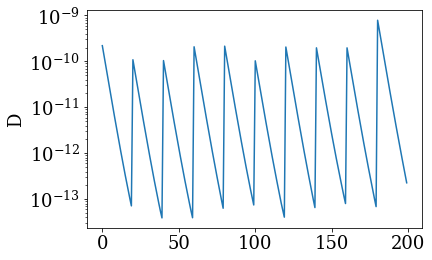

In [8]:
plt.plot(breakdown.D)
plt.ylabel("D")
plt.yscale('log')

Text(0,0.5,"L'")

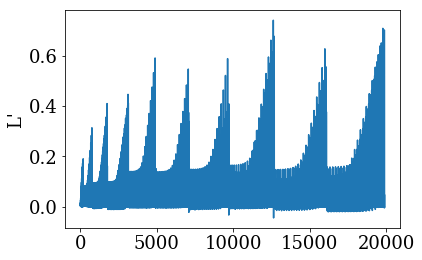

In [9]:
plt.plot(breakdown.Lprime)
plt.ylabel("L'")

Notice how $L'$ has quickly varying elements across its dimension, with clear periodic structure. In some applications, it is more useful to order this array in a more natural way.

Text(0,0.5,"L'")

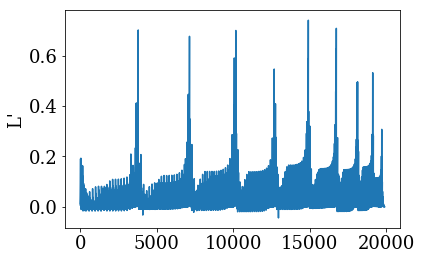

In [10]:
#Pass the covariance matrix into a breakdown object and print the attributes
breakdown2 = cb.breakdown(C, unravel_diagonally=True)
plt.plot(breakdown2.Lprime)
plt.ylabel("L'")

## Covariance breakdown - what you've seen here

In this notebook you saw how the `covariance_breakdown` tool can be used to breakdown covariances into the parts that come out of the LDL Cholesky decomposition. You have seen how you can use the tool to get the $L'$ matrix delivered in a way that the elements are ordered in two different ways. You should be able to use this tool to easily do LDL decompositions.